In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

PCA can be used to remove noise from data because it discards informations that are not so important and noises are usually not relevant information

##### IMPORTING DIGITS DATABASE

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

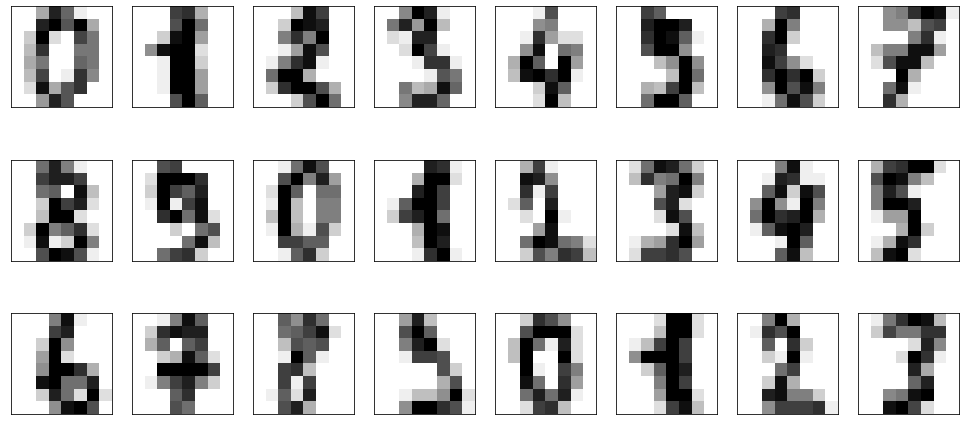

In [73]:
fig, axes =  plt.subplots(3,8, figsize = (17,8), subplot_kw={'yticks' : [], 'xticks' : []})

for i, ax in enumerate(axes.flat):

    ax.imshow(digits.images[i], cmap= plt.cm.gray_r)

##### Randomly adding noise to the images

In [214]:
noisy_digits = np.random.normal(digits.data,4)

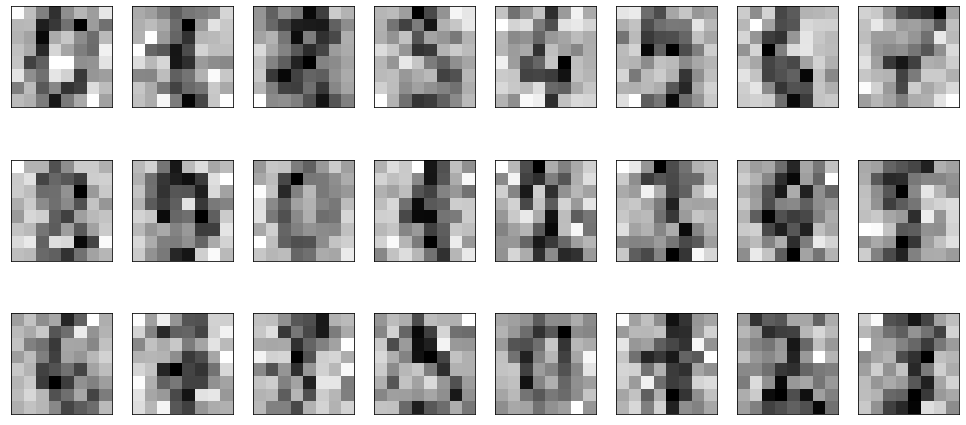

In [215]:
fig, axes =  plt.subplots(3,8, figsize = (17,8), subplot_kw={'yticks' : [], 'xticks' : []})

for i, ax in enumerate(axes.flat):

    ax.imshow(noisy_digits[i].reshape(8,8), cmap= plt.cm.gray_r)

##### Applying PCA to test noise reduction

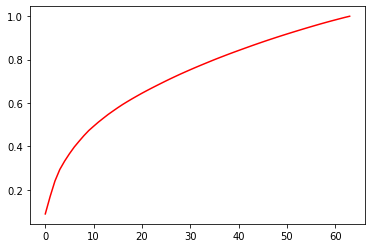

In [219]:
pca = PCA()

pca.fit_transform(noisy_digits)

components = pca.transform(noisy_digits)

plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'red')

plt.show()

##### Removing most of the data (around 50%) should remove a great part of the noise allowing us to differentiate the numbers

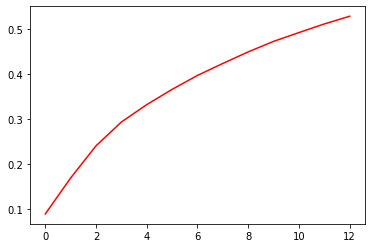

In [248]:
pca = PCA(n_components=13)

pca.fit_transform(noisy_digits)

components = pca.transform(noisy_digits)

plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'red')

plt.show()

In [249]:
for i in range(len(pca.explained_variance_ratio_)):

    print("PCA %2d: %6.2f%%   -> Cumulated %6.2f%%" %(i,pca.explained_variance_ratio_[i]*100, np.cumsum(pca.explained_variance_ratio_)[i]*100 ))

PCA  0:   8.86%   -> Cumulated   8.86%
PCA  1:   8.01%   -> Cumulated  16.87%
PCA  2:   7.16%   -> Cumulated  24.03%
PCA  3:   5.31%   -> Cumulated  29.33%
PCA  4:   3.87%   -> Cumulated  33.20%
PCA  5:   3.40%   -> Cumulated  36.61%
PCA  6:   3.10%   -> Cumulated  39.71%
PCA  7:   2.67%   -> Cumulated  42.38%
PCA  8:   2.57%   -> Cumulated  44.96%
PCA  9:   2.34%   -> Cumulated  47.30%
PCA 10:   1.96%   -> Cumulated  49.26%
PCA 11:   1.92%   -> Cumulated  51.18%
PCA 12:   1.72%   -> Cumulated  52.90%


Components:  13
Information manteined: 52.90%
Information Lost: 47.10%


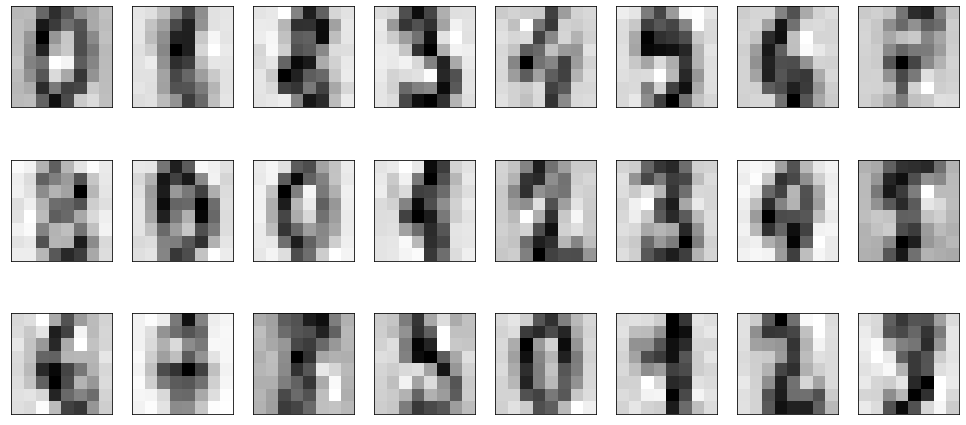

In [250]:
#Plotting the recovered dataset with the components created

recovered = pca.inverse_transform(components)

fig, axes =  plt.subplots(3,8, figsize = (17,8), subplot_kw={'yticks' : [], 'xticks' : []})

for i, ax in enumerate(axes.flat):

    ax.imshow(recovered[i].reshape(8,8), cmap= plt.cm.gray_r)


print('Components: %3d' % (pca.explained_variance_ratio_.shape))

print('Information manteined: %3.2f%%' %(pca.explained_variance_ratio_.sum()*100))

print('Information Lost: %3.2f%%' %((1 - pca.explained_variance_ratio_.sum()) *100))

##### Comparing noise-added images with PCAed ones

* Most of the numbers now are identifiable aafter removing 47% of the information

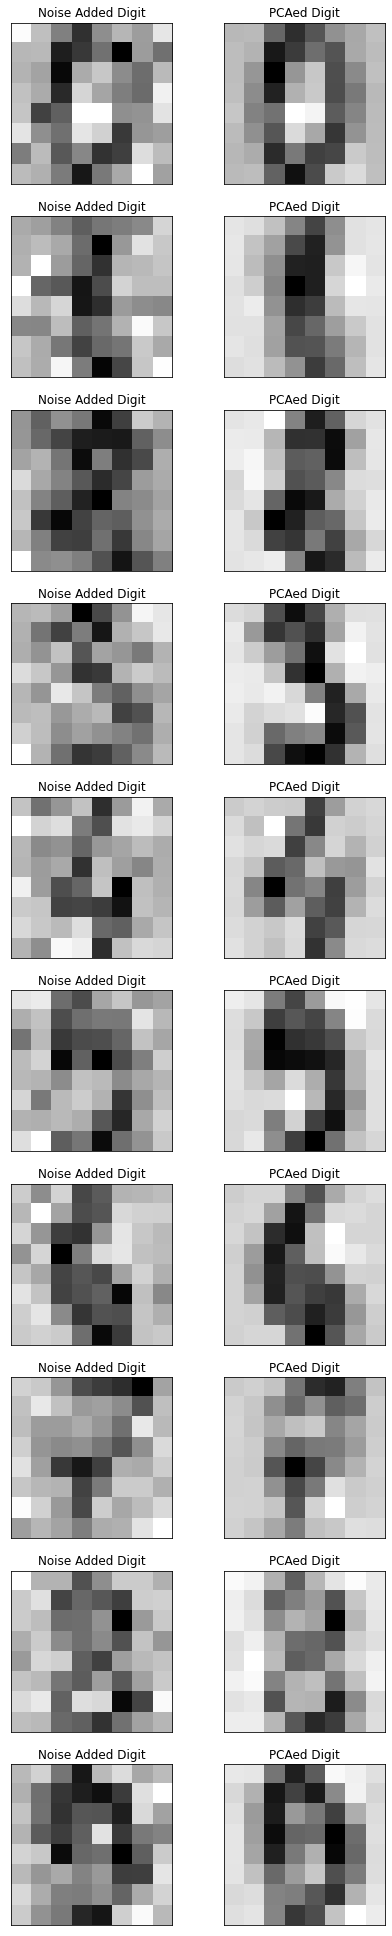

In [251]:
fig, axes =  plt.subplots(10,2, figsize = (7,35), subplot_kw={'yticks' : [], 'xticks' : []})

row = 0
column = 0

for i in range(10):

    axes[row][column].imshow(noisy_digits[i].reshape(8,8), cmap= plt.cm.gray_r)
    axes[row][column].set_title('Noise Added Digit')

    column +=1

    axes[row][column].imshow(recovered[i].reshape(8,8), cmap= plt.cm.gray_r)
    axes[row][column].set_title('PCAed Digit')

    row += 1
    column = 0